# 1.Project Overview:
In this project, I selected "Chess Game Dataset (Lichess)" from kaggle.com and I applied core statistical techniques to analyze and interpret the data.
(https://www.kaggle.com/datasets/datasnaek/chess)

# Data Description
This is a set of just over 20,000 games collected from a selection of users on the site Lichess.org, and how to collect more. I will also upload more games in the future as I collect them. This set contains the:

* Game ID;
* Rated (T/F);
* Start Time;
* End Time;
* Number of Turns;
* Game Status;
* Winner;
* Time Increment;
* White Player ID;
* White Player Rating;
* Black Player ID;
* Black Player Rating;
* All Moves in Standard Chess Notation;
* Opening Eco (Standardised Code for any given opening, list here);
* Opening Name;
* Opening Ply (Number of moves in the opening phase)

For each of these separate games from Lichess. This data is collected using the Lichess API, which enables collection of any given users game history. The difficult part was collecting usernames to use, however the API also enables dumping of all users in a Lichess team. There are several teams on Lichess with over 1,500 players, so this proved an effective way to get users to collect games from. Dataset sturcture is tabular.

## Selected Numerical Variable: Number of Turns
In this project, the numerical variable selected for analysis is turns, representing the total number of moves in a chess game. This variable:

* Is continuous and quantitative in nature.

* Can take values ranging from 1 to over 100, depending on the game.

* Is related to factors such as game duration, player level, and game outcome.

* Provides meaningful insights for analyses such as outlier detection, distribution patterns, and sample size estimation.



# Descriptive Statistics:


In [6]:
import pandas as pd
import numpy as np

# read and get the data
df = pd.read_csv("games.csv")

# calculating part
turns = df['turns'].dropna()
mean_turns = np.mean(turns)
median_turns = np.median(turns)
variance_turns = np.var(turns, ddof=1)  # ddof=1 çünkü örneklem varyansı
std_turns = np.std(turns, ddof=1)
stderr_turns = std_turns / np.sqrt(len(turns))

print("----- Descriptive Statistics for 'turns' -----")
print(f"1. Mean: {mean_turns:.2f}")
print(f"2. Median: {median_turns:.2f}")
print(f"3. Variance: {variance_turns:.2f}")
print(f"4. Standard Deviation: {std_turns:.2f}")
print(f"5. Standard Error: {stderr_turns:.2f}")


----- Descriptive Statistics for 'turns' -----
1. Mean: 60.47
2. Median: 55.00
3. Variance: 1126.98
4. Standard Deviation: 33.57
5. Standard Error: 0.24


# Data Visualization:
## Histogram Interpretation:
The histogram shows that the distribution of turns is right-skewed. Most games seem to have between 40 and 70 moves. The distribution is not perfectly symmetric, which suggests that some games last much longer than others and pull the average upward.

## Boxplot Interpretation:
In the boxplot, the median number of turns appears to be around 55. Several outliers are present, especially games with more than 100 moves. These longer games are rare but have an effect on the overall distribution.

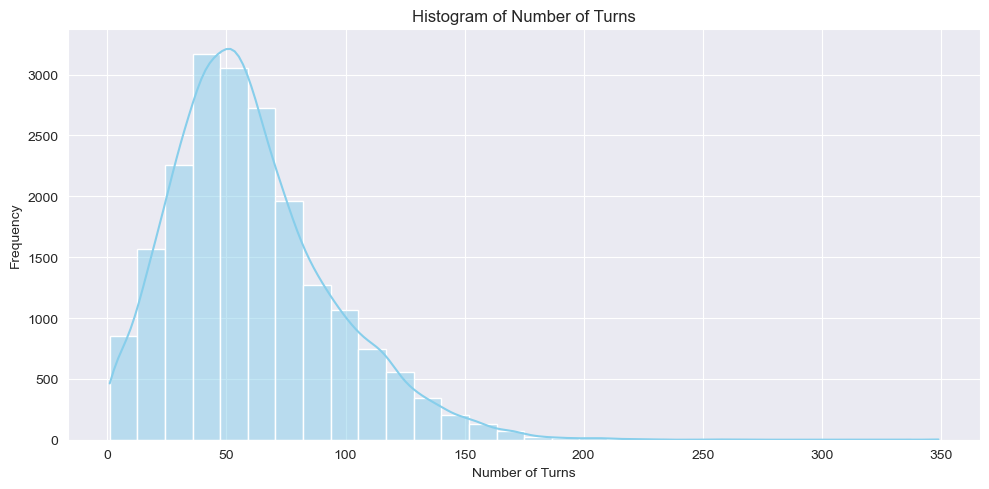

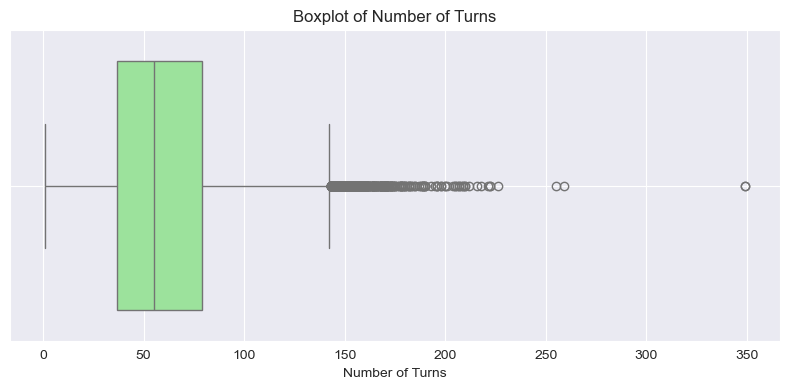

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# drawing 2 tables
plt.figure(figsize=(10, 5))
sns.histplot(turns, bins=30, kde=True, color='skyblue')
plt.title("Histogram of Number of Turns")
plt.xlabel("Number of Turns")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 4))
sns.boxplot(x=turns, color='lightgreen')
plt.title("Boxplot of Number of Turns")
plt.xlabel("Number of Turns")
plt.grid(True)
plt.tight_layout()
plt.show()


# Confidence Intervals:
## Interpretation
For the turns variable, 95% confidence intervals were calculated for both the mean and the variance.

The confidence interval for the mean is between 60.00 and 60.93.
This means that, based on the sample data, we can be 95% confident that the true population mean falls within this range.

The confidence interval for the variance is between 1105.25 and 1149.37.
This tells us how much the number of moves varies from game to game.

In [3]:
from scipy import stats
import numpy as np

#num of turns(örneklem)
n = len(turns)

# Ortalama için %95 güven aralığı (t-dağılımı ile)
mean_confidence_interval = stats.t.interval(
    confidence=0.95,
    df=n - 1,
    loc=np.mean(turns),
    scale=np.std(turns, ddof=1) / np.sqrt(n)
)


alpha = 0.05
sample_variance = np.var(turns, ddof=1)
chi2_lower = stats.chi2.ppf(1 - alpha / 2, df=n - 1)
chi2_upper = stats.chi2.ppf(alpha / 2, df=n - 1)
variance_ci_lower = (n - 1) * sample_variance / chi2_lower
variance_ci_upper = (n - 1) * sample_variance / chi2_upper


print("----- 95% Confidence Intervals -----")
print(f"Mean CI: ({mean_confidence_interval[0]:.2f}, {mean_confidence_interval[1]:.2f})")
print(f"Variance CI: ({variance_ci_lower:.2f}, {variance_ci_upper:.2f})")


----- 95% Confidence Intervals -----
Mean CI: (60.00, 60.93)
Variance CI: (1105.25, 1149.37)


# Sample Size Estimation:
## Interpretation
In this step, the required sample size was calculated in order to estimate the mean number of moves (turns) with a maximum margin of error of ±0.1 at a 90% confidence level.

As a result of the calculation:

𝑛
≈
304,911
n≈304,911
This is a very large number, mainly because the desired margin of error is extremely small. To reduce the required sample size, the margin of error can be increased — for example, to ±1. As the margin of error decreases, the sample size needed increases rapidly in order to maintain the same confidence level.

In [8]:
from scipy.stats import norm
import numpy as np

# Hedef: Ortalama için %90 güven düzeyinde, maksimum +-0.1 hata payı ile örneklem büyüklüğü hesaplamak

Z = norm.ppf(0.95)
E = 0.1
sigma = np.std(turns, ddof=1)  # Popülasyon standart sapması tahmini


n_required = (Z * sigma / E) ** 2
n_required_rounded = int(np.ceil(n_required))  # yukarı yuvarla


print("----- Sample Size Estimation -----")
print(f"Required sample size (n) ≈ {n_required_rounded}")


----- Sample Size Estimation -----
Required sample size (n) ≈ 304911


# Hypothesis Testing:
## Interpretation
* Stated Hypotheses:
H₀ (Null Hypothesis): The average number of moves is 60.

H₁ (Alternative Hypothesis): The average number of moves is not 60.

The purpose of this test is to determine whether the average number of moves (turns) in the dataset is equal to 60.

* Test Results:
t-statistic: 1.97

p-value: 0.0493

* Decision:
Since the p-value is less than 0.05, H₀ is rejected.

In [9]:
from scipy import stats

print("Hypothesis:")
print("H0: Ortalama hamle sayısı 60'tır.")
print("H1: Ortalama hamle sayısı 60 değildir.")

# Test edilen değer
mu_0 = 60

# Tek örneklem t-testi
t_statistic, p_value = stats.ttest_1samp(turns, popmean=mu_0)


print("----- Hypothesis Test Result -----")
print(f"t-statistic: {t_statistic:.2f}")
print(f"p-value: {p_value:.4f}")


if p_value < 0.05:
    print("H₀ is rejected. The mean is significantly different from 60.")
else:
    print("H₀ is not rejected. There is not enough evidence to say the mean is different from 60.")


Hypothesis:
H0: Ortalama hamle sayısı 60'tır.
H1: Ortalama hamle sayısı 60 değildir.
----- Hypothesis Test Result -----
t-statistic: 1.97
p-value: 0.0493
H₀ is rejected. The mean is significantly different from 60.


# Conclusion:

In this project, statistical analysis was performed on the turns variable (total number of moves) using a dataset of over 20,000 chess games from Lichess.org.

## Key Findings:

* The average number of moves was 60.47, with a median of 55.

* The distribution was right-skewed, with some games exceeding 100 moves as outliers.

* The 95% confidence interval for the mean was calculated as (60.00, 60.93).

* The hypothesis that the mean is 60 was rejected based on the p-value.

* To estimate the mean with a margin of error of ±0.1 at 90% confidence, a sample size of 304,911 would be required.

## Final Thoughts:
The dataset was rich and suitable for analysis. These results helped me understand the variability in game lengths and how even small differences in averages can become statistically meaningful when sample sizes are large.

#  References:

## Data Source:
Lichess.org Games Dataset
Kaggle link: https://www.kaggle.com/datasets/datasnaek/chess

## Python Libraries Used:
pandas

numpy

matplotlib.pyplot

seaborn

scipy.stats

## Got Some Informations from

stack_overflow